# Task 4.1: Perceptron model in python
## Introduction
In this task you shall model a single perceptron in python and understand how it works. The task of the perceptron will be to predict the outcome of an unknown logical circuit. However, there is some training/target data available from measurements that were made.

Write a python class “perceptron” by implementing the following member functions:

    def __init__(self): initializes the member variable self.synaptic_weights with random values

    def sigmoid(self,x) : sigmoid function

    def sigmoid_derivative(self,x) : derivative of sigmoid function

    def think(self, inputs): one “thought-step” of the perceptron for the given inputs. Returns outputs.

    def train(self, inputs, targets, iterations) : the training loop. Shall be exectuted “iterations”-times to train the network. Does contain backpropagation and weight adjustments.

    if __name__ == “__main__”: the main function. creates one instance of class perceptron, trains it with the training data and asks the user to enter values for the signals I1, I2 and I3. Prints out perceptron’s belief afterwards


In [1]:
import numpy as np

class Perceptron():
    def __init__(self):
        self.synaptic_weights = np.random.rand(3)
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * ( 1.0 - self.sigmoid(x))

    def sigmoid_derivative_faster(self, output):
        return output * (1.0 - output)

    def think(self, inputs):
        return self.sigmoid(np.dot(inputs, self.synaptic_weights))

    def train(self, inputs, targets, iterations):
        for _ in range(iterations):
            if len(inputs) != len(targets):
                print("Error! Dimension of Inputs is not equal with dimension of Targets.")
            for i in range(len(inputs)):
                output = self.think(inputs[i])
                e_out = targets[i] - output
                # self.synaptic_weights += np.dot(e_out * self.sigmoid_derivative(inputs[i]), np.transpose(inputs[i]))
                self.synaptic_weights += np.dot(e_out * self.sigmoid_derivative_faster(output), inputs[i].T)

### Training the Perceptron

In [2]:
p = Perceptron()
print("Synaptic Weights before Training:")
print(p.synaptic_weights)

train_data = np.array([[0, 0, 1],
                       [1, 1, 1],
                       [1, 0, 0],
                       [0, 1, 1]])
target_data = np.array([0, 1, 1, 0])
p.train(train_data, target_data, 10000)

print("Synaptic Weights after Training:")
print(p.synaptic_weights)

Synaptic Weights before Training:
[0.49604426 0.0681096  0.69216116]
Synaptic Weights after Training:
[ 9.16147028  0.3298953  -4.91295015]


### Test Prediction

In [3]:
solution = p.think([1, 0, 0])

print("The Perceptron thinks the output of the logical circuit will be:")
print("Prediction:", 1 if solution >= 0.5 else 0)
print("Actual output:", solution)

The Perceptron thinks the output of the logical circuit will be:
Prediction: 1
Actual output: 0.9998950026324589


### User Programm

In [4]:
if __name__ == "__main__":

    iterations = int(input("Enter number of iterations for Perceptron Training ?>"))

    perceptron = Perceptron()
    print("Synaptic Weights before Training:")
    print(perceptron.synaptic_weights)

    perceptron.train(train_data, target_data, iterations)

    print("Synaptic Weights after Training:")
    print(perceptron.synaptic_weights)

    print("Enter your 3 Input Values (0, 1):")
    I1 = int(input("I1 ?>"))
    I2 = int(input("I2 ?>"))
    I3 = int(input("I3 ?>"))
    print("Predict the outcome for [", I1, ",", I2, ",", I3, "] ...")

    solution = perceptron.think([I1, I2, I3])

    print("Prediction:", 1 if solution >= 0.5 else 0)
    print("Actual output:", solution)

Synaptic Weights before Training:
[0.28479293 0.6554685  0.9871539 ]
Synaptic Weights after Training:
[ 4.17542493  0.22592038 -2.33726291]
Enter your 3 Input Values (0, 1):
Predict the outcome for [ 0 , 0 , 1 ] ...
Prediction: 0
Actual output: 0.08808352315450158


# Task 4.2: Feed-Forward-Network for recognition of handwritten numbers

In [5]:
class FeedForwardNetwork:

    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.input_weights = np.random.rand(inputNodes, hiddenNodes) - 0.5
        self.hidden_weigths = np.random.rand(hiddenNodes, outputNodes) - 0.5
        self.learning_rate = learningRate

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def sigmoid_derivative(self, o):
        return o * (1.0 - o)

    def think(self, inputs):
        hidden_output = self.sigmoid(np.dot(inputs, self.input_weights))
        return self.sigmoid(np.dot(hidden_output, self.hidden_weigths))

    def train(self, inputs, targets, iterations):
        for _ in range(iterations):
            for i in range(len(inputs)):
                hidden_output = self.sigmoid(np.dot(inputs[i], self.input_weights))
                final_output = self.sigmoid(np.dot(hidden_output, self.hidden_weigths))

                error_out = targets[i] - final_output
                error_hidden = np.dot(self.hidden_weigths, error_out)

                delta_who = np.outer(hidden_output, error_out * self.sigmoid_derivative(final_output))
                delta_wih = np.outer(inputs[i], error_hidden * self.sigmoid_derivative(hidden_output))

                self.hidden_weigths += self.learning_rate * delta_who
                self.input_weights  += self.learning_rate * delta_wih

## Main-Programm

read Images from CSV-File ...
Training the Feed-Forward-Network ( 100 times) ...
plotting images ...


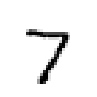

Prediction:  7


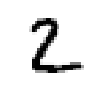

Prediction:  2


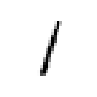

Prediction:  1


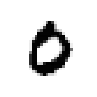

Prediction:  0


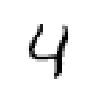

Prediction:  4


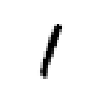

Prediction:  1


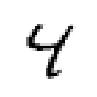

Prediction:  9


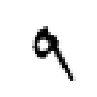

Prediction:  4


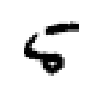

Prediction:  1


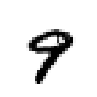

Prediction:  9
------------------------------------------------------
The Feed-Forwarding-Network predicted 70.0 % of the images correctly.


In [8]:
import matplotlib.pyplot as plt

if __name__ == "__main__":

    input_nodes = 784 #28*28 pixel
    hidden_nodes = 200 #voodoo magic number
    output_nodes = 10 #numbers from [0:9]

    learning_rate = 0.3 #feel free to play around with

    iterations = 100

    print("read Images from CSV-File ...")
    training_data = np.loadtxt("mnist_train_100.csv", delimiter=",", dtype='float64')
    test_data = np.loadtxt("mnist_test_10.csv", delimiter=",", dtype='float64')

    training_inputs  = training_data[:, 1:] / 255.0 * 0.98 + 0.01
    test_inputs = test_data[:, 1:] / 255.0 * 0.98 + 0.01
    training_targets = np.array([[0.01 if  label != i else 0.99 for i in range(10)] for label in training_data[:, 0]])
    test_targets = np.array([[0.01 if  label != i else 0.99 for i in range(10)] for label in test_data[:, 0]])

    n = FeedForwardNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    print("Training the Feed-Forward-Network (", iterations, "times) ...")
    n.train(training_inputs, training_targets, iterations)

    correct_predictions = 0

    print("plotting images ...")
    for i in range(len(test_data)):
        image_array = test_inputs[i].reshape(28,28)
        plt.imshow(image_array, cmap='Greys', interpolation='None')
        plt.axis('off')
        plt.rcParams['figure.figsize'] = [1, 1]
        plt.show(block = False)

        output = n.think(test_inputs[i])
        expected = np.argmax(test_targets[i])
        # expected = test_data[i, 0]
        prediction = np.argmax(output)
        if expected == prediction: correct_predictions += 1
        #print("Expected:   ", expected)
        print("Prediction: ", prediction)
        #print("Probability:", np.max(output) * 100, "%")
    
    print("------------------------------------------------------")
    print("The Feed-Forwarding-Network predicted", correct_predictions / len(test_data) * 100, "% of the images correctly.")


### Creating my own Dataset for Testing

I created 10 photos of my own handwriting that contain all possible numbers. Then I asked chatgpt to generate a python-script to convert these images into the csv-format we used earlier. The result is this file [my_mnist_test_10.csv](my_mnist_test_10.csv).

read Images from CSV-File ...
plotting images ...


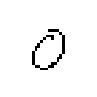

Expected:    0
Prediction:  7
Probability: 11.510841695861956 %


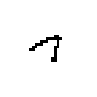

Expected:    1
Prediction:  4
Probability: 29.169403006967993 %


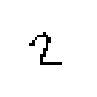

Expected:    2
Prediction:  1
Probability: 11.342933281767902 %


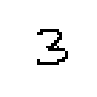

Expected:    3
Prediction:  1
Probability: 21.916435102386775 %


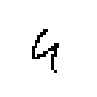

Expected:    4
Prediction:  9
Probability: 52.145018051257985 %


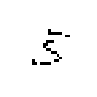

Expected:    5
Prediction:  1
Probability: 13.908058747549331 %


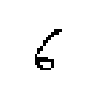

Expected:    6
Prediction:  7
Probability: 19.163109911779745 %


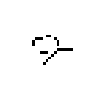

Expected:    7
Prediction:  4
Probability: 18.52744291061896 %


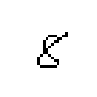

Expected:    8
Prediction:  8
Probability: 16.532324690308975 %


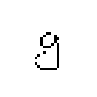

Expected:    9
Prediction:  6
Probability: 28.09916205761725 %
------------------------------------------------------
The Feed-Forwarding-Network predicted 10.0 % of the images correctly.
correct predictions:   1
incorrect predictions: 9
Size of the Dataset:   10
Size of the Dataset:   10


In [ ]:
def test_network(test_data_file, plot_active):
    print("read Images from CSV-File ...")
    test_data = np.loadtxt(test_data_file, delimiter=",", dtype='float64')

    test_inputs = test_data[:, 1:] / 255.0 * 0.98 + 0.01
    test_targets = np.array([[0.01 if  label != i else 0.99 for i in range(10)] for label in test_data[:, 0]])

    correct_predictions = 0
    incorrect_predictions = 0

    print("plotting images ...")
    for i in range(len(test_data)):

        output = n.think(test_inputs[i])
        expected = np.argmax(test_targets[i])
        # expected = test_data[i, 0]
        prediction = np.argmax(output)
        # if expected == prediction: correct_predictions += 1
        if expected == prediction:
            correct_predictions += 1 
        else:
            incorrect_predictions += 1
        if plot_active:
            image_array = test_inputs[i].reshape(28,28)
            plt.imshow(image_array, cmap='Greys', interpolation='None')
            plt.axis('off')
            plt.rcParams['figure.figsize'] = [1, 1]
            plt.show(block = False)
            print("Expected:   ", expected)
            print("Prediction: ", prediction)
            print("Probability:", np.max(output) * 100, "%")
    
    print("------------------------------------------------------")
    print("The Feed-Forwarding-Network predicted", correct_predictions / len(test_data) * 100, "% of the images correctly.")
    print("correct predictions:  ", correct_predictions)
    print("incorrect predictions:", incorrect_predictions)
    print("Size of the Dataset:  ", incorrect_predictions + correct_predictions)
    print("Size of the Dataset:  ", len(test_data))

test_network("my_mnist_test_10.csv", True)

### Conclusion of Tests:
My feed forwarding network predicted 40% of my data correctly. That is not quite satisfying my goals. I think my numbers take up less space than the original database which might be a reason for the 30% accuracy loss compared to the first test.

I will train the network with the full mnist dataset to check the improvements in accuracy if we have a bigger training database.

In [ ]:
INPUT_NODES = 784       # 28*28 pixel
HIDDEN_NODES = 200      # voodoo magic number
OUTPUT_NODES = 10       # numbers from [0:9]

LEARNING_RATE = 0.3     # feel free to play around with

ITERATIONS = 10

def train_ffn(train_data_file, input_nodes, hidden_nodes, output_nodes, learning_rate, training_iterations) -> FeedForwardNetwork:

    print("read Images from CSV-File ...")
    training_data = np.loadtxt(train_data_file, delimiter=",", dtype='float64')

    training_inputs  = training_data[:, 1:] / 255.0 * 0.98 + 0.01
    training_targets = np.array([[0.01 if  label != i else 0.99 for i in range(10)] for label in training_data[:, 0]])

    network = FeedForwardNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    print("Training the Feed-Forward-Network (", iterations, " iterations, ", len(training_data), "images ) ...")
    network.train(training_inputs, training_targets, training_iterations)

    return network
n_alt = n
n = train_ffn("mnist_train_full.csv", INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, LEARNING_RATE, ITERATIONS)

read Images from CSV-File ...
Training the Feed-Forward-Network ( 100  iterations,  60000 images ) ...


# A looong time later ...
(Actually not that long)
Now it is Time to check the benefit of Training with the entire MNIST Dataset.

### 1. Test with my own handwriting
Apparently our feed forwarding network rather likes to see us code

In [ ]:
test_network("my_mnist_test_10.csv", False)

read Images from CSV-File ...
plotting images ...
------------------------------------------------------
The Feed-Forwarding-Network predicted 60.0 % of the images correctly.
correct predictions:   6
incorrect predictions: 4
Size of the Dataset:   10
Size of the Dataset:   10


### 2. Test with the official MNIST Test-data
I will not plot the test-data.
But 97% accuracy seems pretty solid.

In [ ]:
test_network("mnist_test_full.csv", False)

read Images from CSV-File ...
plotting images ...
------------------------------------------------------
The Feed-Forwarding-Network predicted 97.295 % of the images correctly.
correct predictions:   58377
incorrect predictions: 1623
Size of the Dataset:   60000
Size of the Dataset:   60000


### 3. Test with the development test data
The results are very good! Now we reach 100% accuracy with the development test.

In [ ]:
test_network("mnist_test_10.csv", False)

read Images from CSV-File ...
plotting images ...
------------------------------------------------------
The Feed-Forwarding-Network predicted 100.0 % of the images correctly.
correct predictions:   10
incorrect predictions: 0
Size of the Dataset:   10
Size of the Dataset:   10
